# NLP Pipeline
We will learn some basic operations of the NLP pipelines with the help of two libraries, NLTK and spaCy. These will prove useful in your project for tasks such as preprocessing.

In [1]:
%pip install -q nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


## NLTK
We will use [Chapter 3 of the introductory manual of NLTK](https://www.nltk.org/book/ch03.html) to solve the following exercises.

First, use the interactive downloader to get the *gutenberg* book corpus (in the *Corpora* tab). Take a moment to admire the amazing user interface.

In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  gutenberg


      Unzipping corpora/gutenberg.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

NLTK automatically saves its files in the `nltk_data` folder in your home directory. (Windows users: Maybe it's in your `Documents`?)

We load the raw text of the first book in the corpus.

In [3]:
from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt')
print(len(raw_text))

887071


To use nltk's tokenization, we need to download the `punkt_tab` resource.

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Count the number of words and sentences in the book.

In [11]:
words = nltk.word_tokenize(raw_text)
sentences =  nltk.sent_tokenize(raw_text)
print(len(words))
print(len(sentences))

191855
7493


- Lowercase all words. 
- Count the number of unique lower-cased words in the book.

In [12]:
len(set([w.lower() for w in words]))

7914

The total number of words is also called *tokens*, and the unique words are the *types*. (This is the same distinction as instance vs. class in software engineering.)

We now perform *stemming* on the first 50 words of the text. We use the PorterStemmer (example usage [here](https://www.nltk.org/howto/stem.html)). Plot only the pairs of words that have changed after stemming.

In [25]:
stemmer = nltk.stem.PorterStemmer()

for w in words[:50]:
    stemmed = stemmer.stem(w)
    if w != stemmed:
        print(w, stemmed)

Emma emma
Jane jane
Austen austen
VOLUME volum
I i
CHAPTER chapter
I i
Emma emma
Woodhouse woodhous
handsome handsom
comfortable comfort
happy happi
disposition disposit
seemed seem
unite unit
blessings bless
existence exist
lived live
nearly nearli
twenty-one twenty-on
years year


Find the 10 most frequent words, together with their counts, using the `FreqDist` object from NLTK. Save it to a variable named `fdist`.

In [29]:
fdist = nltk.FreqDist(words)
print(fdist.most_common(10))

[(',', 12016), ('.', 6355), ('to', 5125), ('the', 4844), ('and', 4653), ('of', 4272), ('I', 3177), ('--', 3100), ('a', 3001), ("''", 2452)]


Run the below command to see the word counts vs. the words in the frequency distribution.

<Axes: xlabel='Samples', ylabel='Counts'>

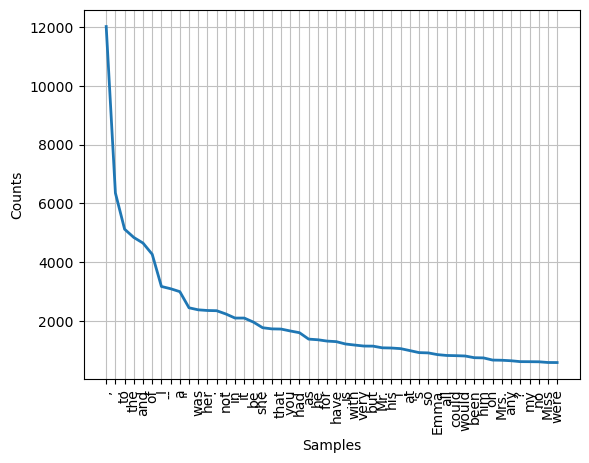

In [17]:
fdist.plot(50)

This curve is characteristic of any natural (= human) language, and is known as [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). It states that the frequency of a word is inversely proportional to its rank, i.e.:
$$\text{frequency}(x) \propto \frac{1}{\text{rank}(x)}$$

## spaCy
We will use the [spaCy 101 guide](https://spacy.io/usage/spacy-101) to familiarize ourselves with its capabilities. First we install and download the small core model for English.

In [18]:
%pip install setuptools wheel
%pip install spacy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 117.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.9/490.9 kB 147.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 135.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 143.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

*(You may have to restart your kernel after installing spacy.)*

We can now load the NLP pipeline from the small model.

In [19]:
import spacy
pipeline = spacy.load('en_core_web_sm')
doc = pipeline('Apple is looking at buying U.K. startup for $1 billion.')

The `doc` object has now tokenized our sentence and ran the NLP pipeline on it, as shown in this image:
![spacy pipeline](https://spacy.io/images/pipeline.svg)

Use the 101 guide to display the following information about each token.
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple [UPOS](https://universaldependencies.org/u/pos/) part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is stopword: Is the token part of a stop list, i.e. the most common words of the language?

In [22]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx False
is be AUX VBZ aux xx True
looking look VERB VBG ROOT xxxx False
at at ADP IN prep xx True
buying buy VERB VBG pcomp xxxx False
U.K. U.K. PROPN NNP dobj X.X. False
startup startup NOUN NN dep xxxx False
for for ADP IN prep xxx True
$ $ SYM $ quantmod $ False
1 1 NUM CD compound d False
billion billion NUM CD pobj xxxx False
. . PUNCT . punct . False


Looking at the named entities in `doc`, print the following information:
- The token's text
- The start index of the named entity
- Its end index
- The NER label

In [23]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


**Question:** Search the internet for a description of the entity labels `FAC`, `ORG`, `GPE` and `LOC`.

**Answer:** 
FAC
ORG
GPE
LOC

In [28]:
for label in ["FAC", "ORG", "GPE", "LOC"]:
    print(spacy.explain(label))

Buildings, airports, highways, bridges, etc.
Companies, agencies, institutions, etc.
Countries, cities, states
Non-GPE locations, mountain ranges, bodies of water
